# SALES ANALYSIS USING PANDAS

The data set includes products of different types such as coffee, tea, and espresso. For each product, there is information on the product type, date, market size, profit, margin, sales, COGS, total expenses, marketing expenses, inventory, and budgeted profit, COGS, margin, and sales. the market has four sections namely:central, east,west, and south.

This analysis will answer the following questions:
1. Which product type has the highest sales and profit?
2. Which product type has the highest sales in each market section?
3. Did the company acheive its expected sales on each product type?
4. Did the company make its expected profit on each product type?

To begin with, we import the required libraries namely:
Numpy,
Pandas, and
Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The next step is to load the data into pandas dataframe

In [2]:
sales_data = pd.read_csv('sales.csv')

Having load the data into pandas dataframe, we can now examine the data

In [3]:
sales_data.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [4]:
sales_data.tail()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular
4247,985,Louisiana,South,Small Market,4.0,90.0,153.0,64.0,81.0,58.0,-113.0,10.0,50.0,80.0,130.0,4,05/01/11 00:00:00,Espresso,Caffe Latte,Regular


In [7]:
# show statistical summary of the data
sales_data.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [8]:
# show all the columns in the dataframe
sales_data.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [9]:
# display the number of rows and columns
sales_data.shape

(4248, 20)

In [11]:
# Provide basic info about the dataframe
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o


Data cleaning: we inspect the data for any null values, duplicates or outliers. if there is any, we perform the necessary operations to correct or remove them

In [12]:
# Check for null values
sales_data.isnull()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# show null values by columns
sales_data.isnull().any()

Area Code         False
State             False
Market            False
Market Size       False
Profit            False
Margin            False
Sales             False
COGS              False
Total Expenses    False
Marketing         False
Inventory         False
Budget Profit     False
Budget COGS       False
Budget Margin     False
Budget Sales      False
ProductId         False
Date              False
Product Type      False
Product           False
Type              False
dtype: bool

In [13]:
# Sum up all the null values in each column
sales_data.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [15]:
# Check for duplicates
sales_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4243    False
4244    False
4245    False
4246    False
4247    False
Length: 4248, dtype: bool

From the above operations that we performed on the data, we can see that there are no duplicates or null values in the data. Now we move on to answering the above-stated questions. We'll also make make a copy of the data so we can always have the original data intact incase of loss of information.

In [16]:
# Make a copy of the original data
sales_data2 = sales_data.copy()

In [17]:
sales_data2

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular


Question 1:  Which product type has the highest sales and profit?


In [18]:
# Group data by product type and sum its sales and profit
grouped_product_type = sales_data2.groupby('Product Type')[['Sales','Profit']].sum()
grouped_product_type

,Sales,Profit
Product Type,,
Coffee,216828.0,74683.0
Espresso,222996.0,68620.0
Herbal Tea,207214.0,63254.0
Tea,172773.0,52986.0


Text(0.5, 1.0, 'Sales and Profit for each Product Type')

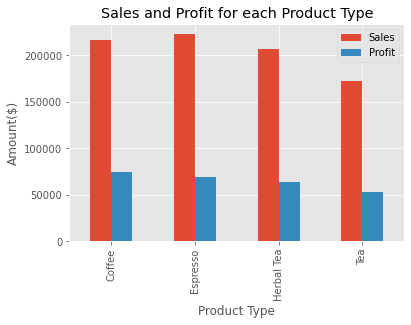

In [19]:
# Plot the data
plt.style.use('ggplot')
grouped_product_type.plot(kind='bar')
plt.xlabel('Product Type')
plt.ylabel('Amount($)')
plt.title('Sales and Profit for each Product Type')

examining the graph above:    
i. highest sales = Espresso    
ii. highest profit = Coffee

Question 2:Which product type has the highest sales in each market section?

In [20]:
# Group the data by Market and product type and sum up the sales
market_sales = sales_data2.groupby(['Market','Product Type'])['Sales'].sum().reset_index()

In [21]:
market_sales

,Market,Product Type,Sales
0,Central,Coffee,69080.0
1,Central,Espresso,59701.0
2,Central,Herbal Tea,67888.0
3,Central,Tea,68376.0
4,East,Coffee,56641.0
5,East,Espresso,48397.0
6,East,Herbal Tea,41361.0
7,East,Tea,32177.0
8,South,Coffee,33259.0
9,South,Espresso,44990.0


In [22]:
# Pivot the table to make Product types as columns and Market as the index
pivot_market_sales = pd.pivot_table(market_sales, index='Market', columns='Product Type', values='Sales')

Text(0.5, 1.0, 'Trends of sales of each product type across the market')

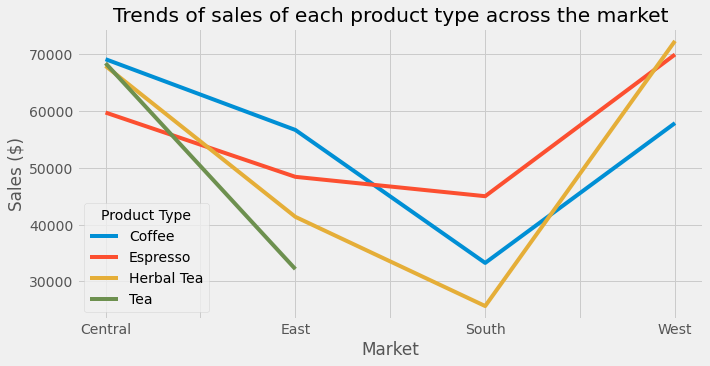

In [23]:
# Visualize the data
plt.style.use('fivethirtyeight')
pivot_market_sales.plot(figsize=(10,5))
plt.xlabel('Market')
plt.ylabel('Sales ($)')
plt.title('Trends of sales of each product type across the market')

If we examine the graph, one would see that the 'Tea' value of  western part of the market was not plotted. this is because the southern part of the market, which  has no value for Tea comes before West. This introduces a break in the plotting of Tea values. therefore, there is a need for us to alter the arrangement of the market sections such  that West come before South.

Recalling our data

In [25]:
# Group the data by Market and product type and sum up the sales
market_sales = sales_data2.groupby(['Market','Product Type'])['Sales'].sum().reset_index()
market_sales

,Market,Product Type,Sales
0,Central,Coffee,69080.0
1,Central,Espresso,59701.0
2,Central,Herbal Tea,67888.0
3,Central,Tea,68376.0
4,East,Coffee,56641.0
5,East,Espresso,48397.0
6,East,Herbal Tea,41361.0
7,East,Tea,32177.0
8,South,Coffee,33259.0
9,South,Espresso,44990.0


In [26]:
# Create a catigorical object with the desired category order
cat_order = pd.Categorical(market_sales['Market'], categories=['West', 'Central', 'East', 'South'], ordered=True)

In [28]:
# Assign the sorted categories back to the "market" column
market_sales['Market'] = cat_order

In [29]:
# Sort the DataFrame by the "market" column
market_sales1 = market_sales.sort_values('Market')

In [30]:
market_sales1

,Market,Product Type,Sales
11,West,Coffee,57848.0
12,West,Espresso,69908.0
13,West,Herbal Tea,72288.0
14,West,Tea,72220.0
0,Central,Coffee,69080.0
1,Central,Espresso,59701.0
2,Central,Herbal Tea,67888.0
3,Central,Tea,68376.0
4,East,Coffee,56641.0
5,East,Espresso,48397.0


In [31]:
# Pivot the table to make Product types as columns and Market as the index
pivot_market_sales1 = pd.pivot_table(market_sales1, index='Market', columns='Product Type', values='Sales')

Text(0.5, 1.0, 'Trends of sales of each product type across the market')

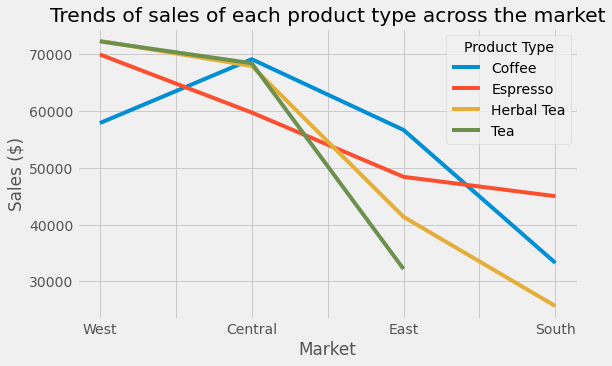

In [32]:
# Visualize the data
plt.style.use('fivethirtyeight')
pivot_market_sales1.plot(figsize=(8,5))
plt.xlabel('Market')
plt.ylabel('Sales ($)')
plt.title('Trends of sales of each product type across the market')

From the graph above,    
i) West:Herbal Tea has the highest sales    
ii) Central:Coffee has the highest sales    
iii) East:Coffee has the highest sales    
iv) South:Espresso has the highest sales

Question 3: Did the company acheive its expected sales on each product type?

In [33]:
sales_comparison = sales_data2.groupby('Product Type')[['Budget Sales','Sales']].sum()
sales_comparison

,Budget Sales,Sales
Product Type,,
Coffee,228620.0,216828.0
Espresso,213480.0,222996.0
Herbal Tea,170460.0,207214.0
Tea,133600.0,172773.0


Text(0.5, 1.0, 'Comparison of the budget sales versus the actual sales')

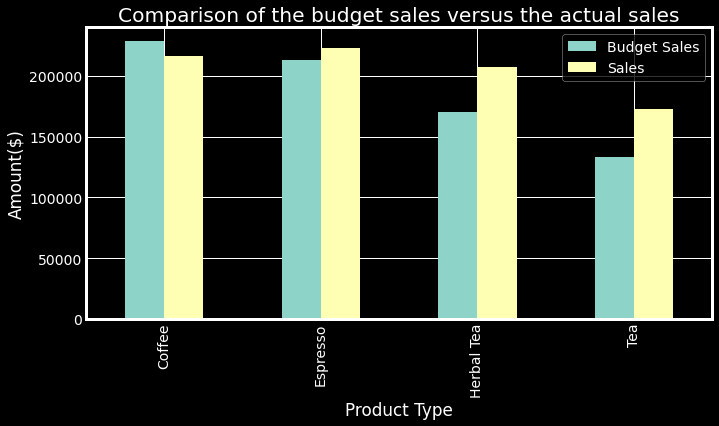

In [36]:
plt.style.use('dark_background')
sales_comparison.plot(kind='bar', figsize=(10,5))
plt.xlabel('Product Type')
plt.ylabel('Amount($)')
plt.title('Comparison of the budget sales versus the actual sales')

Examining the graph above, all product types excluding Coffee met or exceeded their expected sales

**Question 4**: Did the company make its expected profit on each product type?

In [37]:
profit_comparison = sales_data2.groupby('Product Type')[['Budget Profit','Profit']].sum()
profit_comparison

,Budget Profit,Profit
Product Type,,
Coffee,83880.0,74683.0
Espresso,71900.0,68620.0
Herbal Tea,58720.0,63254.0
Tea,44260.0,52986.0


Text(0.5, 1.0, 'Comparison of the budget profit versus the actual profit')

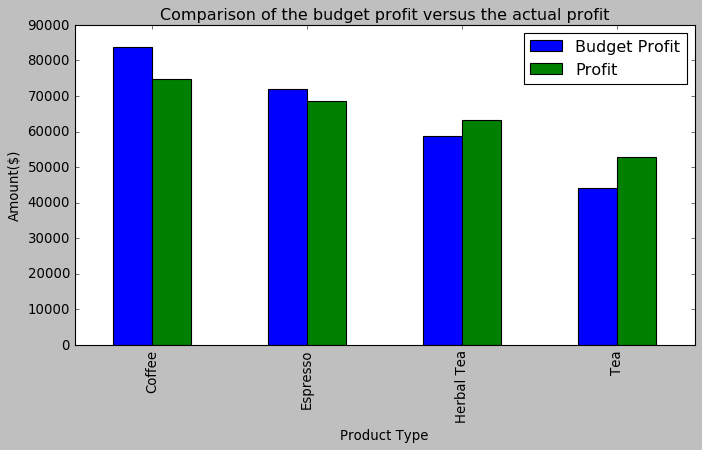

In [77]:
plt.style.use('classic')
profit_comparison.plot(kind='bar', figsize=(10,5))
plt.xlabel('Product Type')
plt.ylabel('Amount($)')
plt.title('Comparison of the budget profit versus the actual profit')

Examining the graph above, only herbal Tea and Tea met or exceeded their expected profits. this shows that Coffee and Expresso performed badly in the market.     
    
    





This brings an end to our analysis. Cheers!
    
    


